In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [12]:
titanic.head(100)
#data[data['age'] < 30]['name']

survived  pclass     sex    age  sibsp  parch      fare embarked   class  \
0          0       3    male  22.00      1      0    7.2500        S   Third   
1          1       1  female  38.00      1      0   71.2833        C   First   
2          1       3  female  26.00      0      0    7.9250        S   Third   
3          1       1  female  35.00      1      0   53.1000        S   First   
4          0       3    male  35.00      0      0    8.0500        S   Third   
5          0       3    male    NaN      0      0    8.4583        Q   Third   
6          0       1    male  54.00      0      0   51.8625        S   First   
7          0       3    male   2.00      3      1   21.0750        S   Third   
8          1       3  female  27.00      0      2   11.1333        S   Third   
9          1       2  female  14.00      1      0   30.0708        C  Second   
10         1       3  female   4.00      1      1   16.7000        S   Third   
11         1       1  female  58.00      0      0   26.5500        S   First   
12         0       3    male  20.00      0      0    8.0500        S   Third   
13         0       3    male  39.00      1      5   31.2750        S   Third   
14         0       3  female  14.00      0      0    7.8542        S   Third   
15         1       2  female  55.00      0      0   16.0000        S  Second   
16         0       3    male   2.00      4      1   29.1250        Q   Third   
17         1       2    male    NaN      0      0   13.0000        S  Second   
18         0       3  female  31.00      1      0   18.0000        S   Third   
19         1       3  female    NaN      0      0    7.2250        C   Third   
20         0       2    male  35.00      0      0   26.0000        S  Second   
21         1       2    male  34.00      0      0   13.0000        S  Second   
22         1       3  female  15.00      0      0    8.0292        Q   Third   
23         1       1    male  28.00      0      0   35.5000        S   First   
24         0       3  female   8.00      3      1   21.0750        S   Third   
25         1       3  female  38.00      1      5   31.3875        S   Third   
26         0       3    male    NaN      0      0    7.2250        C   Third   
27         0       1    male  19.00      3      2  263.0000        S   First   
28         1       3  female    NaN      0      0    7.8792        Q   Third   
29         0       3    male    NaN      0      0    7.8958        S   Third   
..       ...     ...     ...    ...    ...    ...       ...      ...     ...   
70         0       2    male  32.00      0      0   10.5000        S  Second   
71         0       3  female  16.00      5      2   46.9000        S   Third   
72         0       2    male  21.00      0      0   73.5000        S  Second   
73         0       3    male  26.00      1      0   14.4542        C   Third   
74         1       3    male  32.00      0      0   56.4958        S   Third   
75         0       3    male  25.00      0      0    7.6500        S   Third   
76         0       3    male    NaN      0      0    7.8958        S   Third   
77         0       3    male    NaN      0      0    8.0500        S   Third   
78         1       2    male   0.83      0      2   29.0000        S  Second   
79         1       3  female  30.00      0      0   12.4750        S   Third   
80         0       3    male  22.00      0      0    9.0000        S   Third   
81         1       3    male  29.00      0      0    9.5000        S   Third   
82         1       3  female    NaN      0      0    7.7875        Q   Third   
83         0       1    male  28.00      0      0   47.1000        S   First   
84         1       2  female  17.00      0      0   10.5000        S  Second   
85         1       3  female  33.00      3      0   15.8500        S   Third   
86         0       3    male  16.00      1      3   34.3750        S   Third   
87         0       3    male    NaN      0      0    8.0500        S   Third   
88  

In [32]:
titanic[(titanic['survived'] == 1) ].count()

survived       342
pclass         342
sex            342
age            290
sibsp          342
parch          342
fare           342
embarked       340
class          342
who            342
adult_male     342
deck           136
embark_town    340
alive          342
alone          342
dtype: int64

In [29]:
titanic[['survived']].count()

survived    891
dtype: int64

In [33]:
titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [39]:
titanic.groupby('sex')[['survived']].mean()

survived
sex             
female  0.742038
male    0.188908

In [42]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

In [43]:
titanic.pivot_table('survived', index='sex', columns='class')

class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

In [46]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [49]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [50]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class      First    Second     Third       All
sex                                           
female  0.968085  0.921053  0.500000  0.742038
male    0.368852  0.157407  0.135447  0.188908
All     0.629630  0.472826  0.242363  0.383838

In [54]:
births = pd.read_csv('PythonDataScienceHandbook/notebooks/data/births.csv')
births.head(20)

year  month   day gender  births
0   1969      1   1.0      F    4046
1   1969      1   1.0      M    4440
2   1969      1   2.0      F    4454
3   1969      1   2.0      M    4548
4   1969      1   3.0      F    4548
5   1969      1   3.0      M    4994
6   1969      1   4.0      F    4440
7   1969      1   4.0      M    4520
8   1969      1   5.0      F    4192
9   1969      1   5.0      M    4198
10  1969      1   6.0      F    4710
11  1969      1   6.0      M    4850
12  1969      1   7.0      F    4646
13  1969      1   7.0      M    5092
14  1969      1   8.0      F    4800
15  1969      1   8.0      M    4934
16  1969      1   9.0      F    4592
17  1969      1   9.0      M    4842
18  1969      1  10.0      F    4852
19  1969      1  10.0      M    5190

In [56]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender         F         M
decade                    
1960     1753634   1846572
1970    16263075  17121550
1980    18310351  19243452
1990    19479454  20420553
2000    18229309  19106428

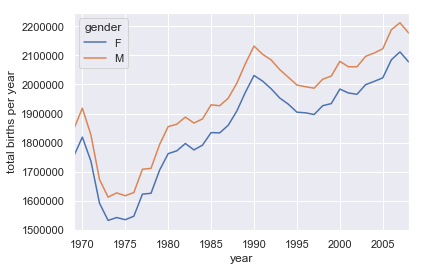

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # Используем стили библиотеки Seaborn
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

In [71]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [73]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births

year  month   day gender  births  decade
0      1969      1   1.0      F    4046    1960
1      1969      1   1.0      M    4440    1960
2      1969      1   2.0      F    4454    1960
3      1969      1   2.0      M    4548    1960
4      1969      1   3.0      F    4548    1960
5      1969      1   3.0      M    4994    1960
6      1969      1   4.0      F    4440    1960
7      1969      1   4.0      M    4520    1960
8      1969      1   5.0      F    4192    1960
9      1969      1   5.0      M    4198    1960
10     1969      1   6.0      F    4710    1960
11     1969      1   6.0      M    4850    1960
12     1969      1   7.0      F    4646    1960
13     1969      1   7.0      M    5092    1960
14     1969      1   8.0      F    4800    1960
15     1969      1   8.0      M    4934    1960
16     1969      1   9.0      F    4592    1960
17     1969      1   9.0      M    4842    1960
18     1969      1  10.0      F    4852    1960
19     1969      1  10.0      M    5190    1960
20     1969      1  11.0      F    4580    1960
21     1969      1  11.0      M    4598    1960
22     1969      1  12.0      F    4126    1960
23     1969      1  12.0      M    4324    1960
24     1969      1  13.0      F    4758    1960
25     1969      1  13.0      M    5076    1960
26     1969      1  14.0      F    5070    1960
27     1969      1  14.0      M    5296    1960
28     1969      1  15.0      F    4798    1960
29     1969      1  15.0      M    5096    1960
...     ...    ...   ...    ...     ...     ...
15037  1988     12  17.0      F    4270    1980
15038  1988     12  17.0      M    4486    1980
15039  1988     12  18.0      F    4211    1980
15040  1988     12  18.0      M    4220    1980
15041  1988     12  19.0      F    5651    1980
15042  1988     12  19.0      M    6065    1980
15043  1988     12  20.0      F    6092    1980
15044  1988     12  20.0      M    6343    1980
15045  1988     12  21.0      F    5462    1980
15046  1988     12  21.0      M    5861    1980
15047  1988     12  22.0      F    5219    1980
15048  1988     12  22.0      M    5510    1980
15049  1988     12  23.0      F    4887    1980
15050  1988     12  23.0      M    5110    1980
15051  1988     12  24.0      F    4024    1980
15052  1988     12  24.0      M    4269    1980
15053  1988     12  25.0      F    3874    1980
15054  1988     12  25.0      M    3961    1980
15055  1988     12  26.0      F    4274    1980
15056  1988     12  26.0      M    4409    1980
15057  1988     12  27.0      F    5633    1980
15058  1988     12  27.0      M    5895    1980
15059  1988     12  28.0      F    5858    1980
15060  1988     12  28.0      M    5989    1980
15061  1988     12  29.0      F    5760    1980
15062  1988     12  29.0      M    5944    1980
15063  1988     12  30.0      F    5742    1980
15064  1988     12  30.0      M    6095    1980
15065  1988     12  31.0      F    4435    1980
15066  1988     12  31.0      M    4698    1980

[14610 rows x 6 columns]

In [75]:
births['day'] = births['day'].astype(int)

In [76]:
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek  # День недели

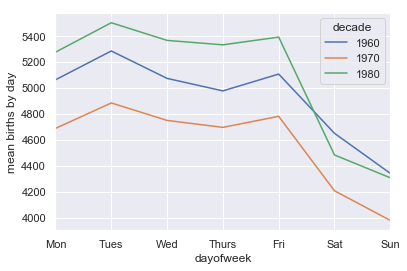

In [77]:
import matplotlib.pyplot as plt
import matplotlib as mpl
births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day'); # среднее количество новорожденных в день

In [81]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [82]:
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]
births_by_date.head()

births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625

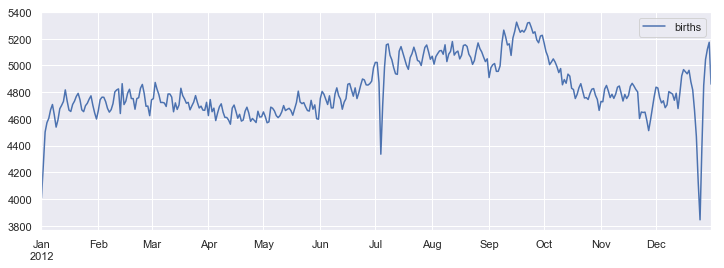

In [83]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);